In [1]:
import sys
sys.path.append("../src")

from plotting import cross_augmentation_plot

import os.path as osp
import pandas as pd

OUPUT_FOLDER = "../output"
FIG_FOLDER = "../fig"

# GraphCL InfoNCE

In [2]:
result_df = pd.read_csv(osp.join(OUPUT_FOLDER, "augmentation_benchmark_graphcl_infonce.csv"))
result_df["MicroF1"] *= 100
result_df["MacroF1"] *= 100

result_df[(result_df.Aug1 == "NodeDropping") & (result_df.Aug2 == "RWSampling")]

,Data,Method,Archi,Mode,Obj,Neg,Aug1,Aug1Strat,Aug2,Aug2Strat,MicroF1,MacroF1
23,PTC_MR,GraphCL,DualBranch,G2G,InfoNCE,NaN,NodeDropping,NaN,RWSampling,NaN,63.0,62.0
49,PTC_MR,GraphCL,DualBranch,G2G,InfoNCE,NaN,NodeDropping,NaN,RWSampling,NaN,51.0,49.0
75,PTC_MR,GraphCL,DualBranch,G2G,InfoNCE,NaN,NodeDropping,NaN,RWSampling,NaN,43.0,40.0
101,PTC_MR,GraphCL,DualBranch,G2G,InfoNCE,NaN,NodeDropping,NaN,RWSampling,NaN,43.0,43.0
127,PTC_MR,GraphCL,DualBranch,G2G,InfoNCE,NaN,NodeDropping,NaN,RWSampling,NaN,60.0,60.0


In [11]:
product_df = result_df[result_df.Aug2 != "EdgeRemoving, FeatureMasking, NodeDropping, RWSampling"]

grouped_data = product_df.groupby(["Aug1", "Aug2"])["MicroF1"].agg(["mean", "std"]).reset_index()
grouped_data["mean_var_str"] = grouped_data.apply(lambda row: f"{row['mean']:.2f} +/- {row['std']:.2f}", axis=1)
grouped_data.drop(columns=['mean', 'std'], inplace=True)

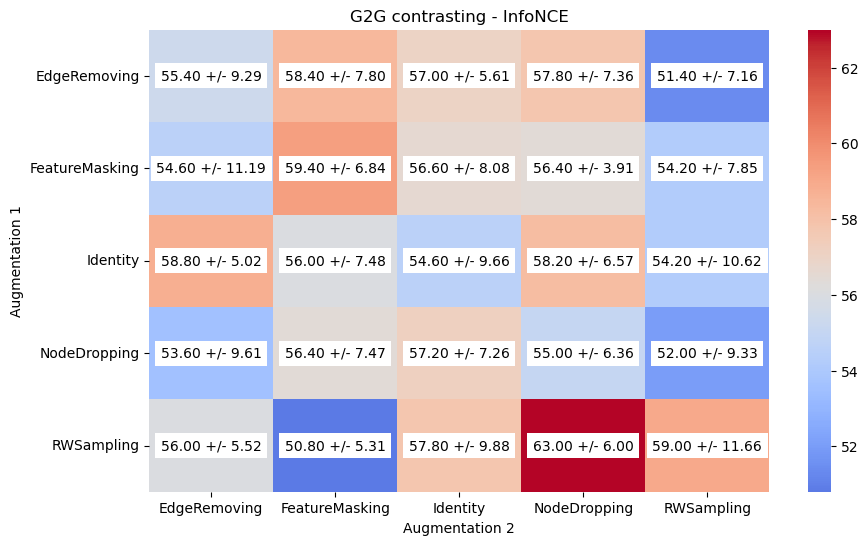

In [4]:
cross_augmentation_plot(
    product_df,
    title="G2G contrasting - InfoNCE",
    savefig=osp.join(FIG_FOLDER, "augmentation_benchmark_graphcl_infonce.png"),
)

# GraphCL - JSD

In [5]:
result_df = pd.read_csv(osp.join(OUPUT_FOLDER, "augmentation_benchmark_graphcl_jsd.csv"))
result_df

,Data,Method,Archi,Mode,Obj,Neg,Aug1,Aug1Strat,Aug2,Aug2Strat,MicroF1,MacroF1
0,PTC_MR,GraphCL,DualBranch,G2G,JSD,NaN,Identity,NaN,Identity,NaN,0.63,0.62
1,PTC_MR,GraphCL,DualBranch,G2G,JSD,NaN,Identity,NaN,FeatureMasking,NaN,0.51,0.47
2,PTC_MR,GraphCL,DualBranch,G2G,JSD,NaN,Identity,NaN,EdgeRemoving,NaN,0.57,0.57
3,PTC_MR,GraphCL,DualBranch,G2G,JSD,NaN,Identity,NaN,RWSampling,NaN,0.66,0.63
4,PTC_MR,GraphCL,DualBranch,G2G,JSD,NaN,Identity,NaN,NodeDropping,NaN,0.54,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...
125,PTC_MR,GraphCL,DualBranch,G2G,JSD,NaN,NodeDropping,NaN,FeatureMasking,NaN,0.69,0.66
126,PTC_MR,GraphCL,DualBranch,G2G,JSD,NaN,NodeDropping,NaN,EdgeRemoving,NaN,0.51,0.50
127,PTC_MR,GraphCL,DualBranch,G2G,JSD,NaN,NodeDropping,NaN,RWSampling,NaN,0.54,0.54
128,PTC_MR,GraphCL,DualBranch,G2G,JSD,NaN,NodeDropping,NaN,NodeDropping,NaN,0.69,0.64


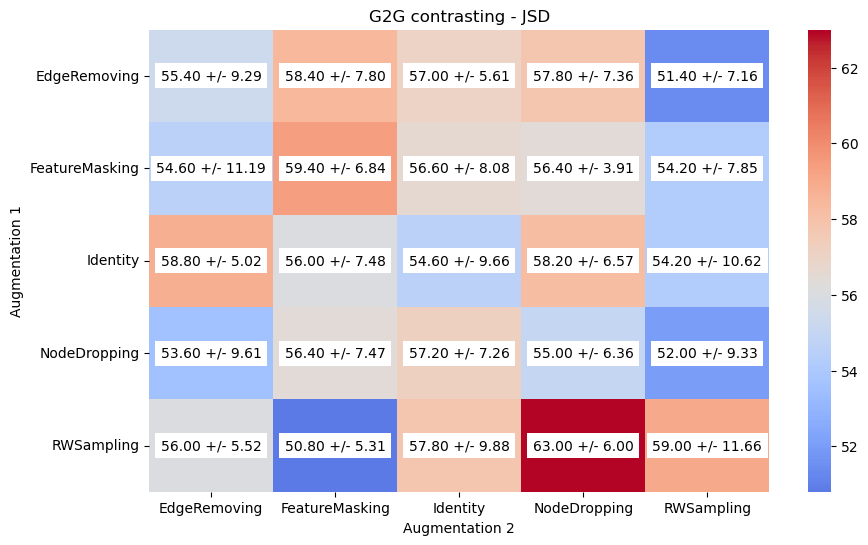

In [6]:
cross_augmentation_plot(
    product_df,
    title="G2G contrasting - JSD",
    savefig=osp.join(FIG_FOLDER, "augmentation_benchmark_graphcl_jsd.png"),
)

# GraphCL - BootstrapLatent

In [7]:
result_df = pd.read_csv(osp.join(OUPUT_FOLDER, "augmentation_benchmark_graphcl_bootstrap.csv"))
result_df

,Data,Method,Archi,Mode,Obj,Neg,Aug1,Aug1Strat,Aug2,Aug2Strat,MicroF1,MacroF1
0,PTC_MR,GraphCL,DualBranch,G2G,BootstrapLatent,NaN,Identity,NaN,Identity,NaN,0.57,0.57
1,PTC_MR,GraphCL,DualBranch,G2G,BootstrapLatent,NaN,Identity,NaN,FeatureMasking,NaN,0.49,0.46
2,PTC_MR,GraphCL,DualBranch,G2G,BootstrapLatent,NaN,Identity,NaN,EdgeRemoving,NaN,0.37,0.36
3,PTC_MR,GraphCL,DualBranch,G2G,BootstrapLatent,NaN,Identity,NaN,RWSampling,NaN,0.60,0.51
4,PTC_MR,GraphCL,DualBranch,G2G,BootstrapLatent,NaN,Identity,NaN,NodeDropping,NaN,0.63,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...
125,PTC_MR,GraphCL,DualBranch,G2G,BootstrapLatent,NaN,NodeDropping,NaN,FeatureMasking,NaN,0.49,0.33
126,PTC_MR,GraphCL,DualBranch,G2G,BootstrapLatent,NaN,NodeDropping,NaN,EdgeRemoving,NaN,0.57,0.36
127,PTC_MR,GraphCL,DualBranch,G2G,BootstrapLatent,NaN,NodeDropping,NaN,RWSampling,NaN,0.60,0.60
128,PTC_MR,GraphCL,DualBranch,G2G,BootstrapLatent,NaN,NodeDropping,NaN,NodeDropping,NaN,0.54,0.47


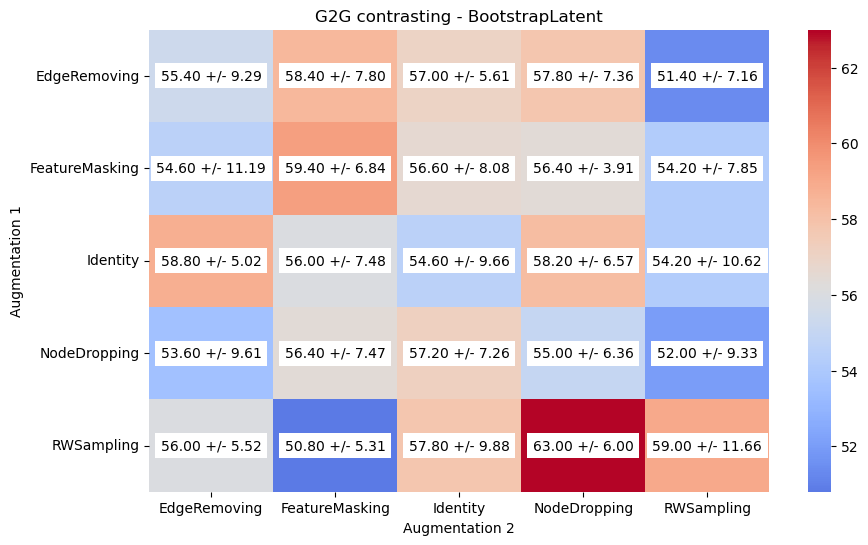

In [8]:
cross_augmentation_plot(
    product_df,
    title="G2G contrasting - BootstrapLatent",
    savefig=osp.join(FIG_FOLDER, "augmentation_benchmark_graphcl_bootstrap.png"),
)

# GraphCL - BarlowTwins

In [9]:
result_df = pd.read_csv(osp.join(OUPUT_FOLDER, "augmentation_benchmark_graphcl_barlow.csv"))
result_df

,Data,Method,Archi,Mode,Obj,Neg,Aug1,Aug1Strat,Aug2,Aug2Strat,MicroF1,MacroF1
0,PTC_MR,GraphCL,DualBranch,G2G,BarlowTwins,NaN,Identity,NaN,Identity,NaN,0.63,0.61
1,PTC_MR,GraphCL,DualBranch,G2G,BarlowTwins,NaN,Identity,NaN,FeatureMasking,NaN,0.69,0.68
2,PTC_MR,GraphCL,DualBranch,G2G,BarlowTwins,NaN,Identity,NaN,EdgeRemoving,NaN,0.54,0.53
3,PTC_MR,GraphCL,DualBranch,G2G,BarlowTwins,NaN,Identity,NaN,RWSampling,NaN,0.51,0.51
4,PTC_MR,GraphCL,DualBranch,G2G,BarlowTwins,NaN,Identity,NaN,NodeDropping,NaN,0.80,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...
125,PTC_MR,GraphCL,DualBranch,G2G,BarlowTwins,NaN,NodeDropping,NaN,FeatureMasking,NaN,0.57,0.57
126,PTC_MR,GraphCL,DualBranch,G2G,BarlowTwins,NaN,NodeDropping,NaN,EdgeRemoving,NaN,0.60,0.57
127,PTC_MR,GraphCL,DualBranch,G2G,BarlowTwins,NaN,NodeDropping,NaN,RWSampling,NaN,0.60,0.59
128,PTC_MR,GraphCL,DualBranch,G2G,BarlowTwins,NaN,NodeDropping,NaN,NodeDropping,NaN,0.57,0.46


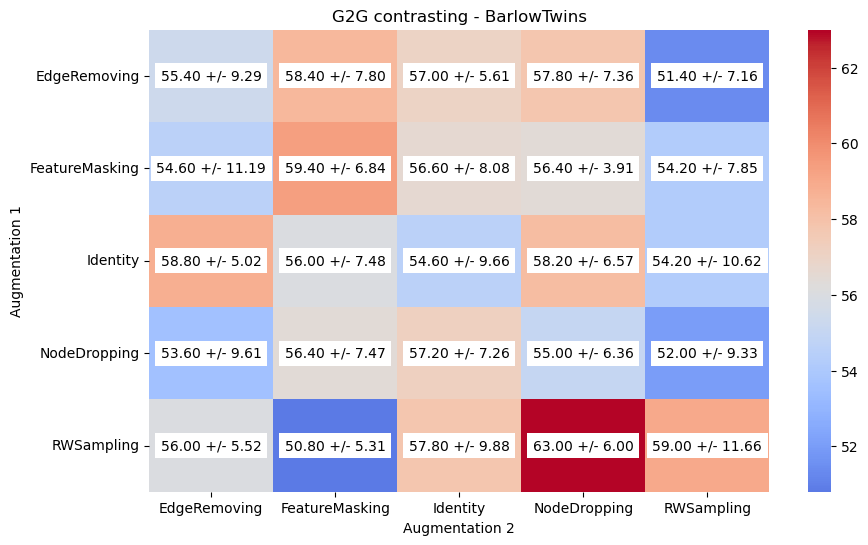

In [10]:
cross_augmentation_plot(
    product_df,
    title="G2G contrasting - BarlowTwins",
    savefig=osp.join(FIG_FOLDER, "augmentation_benchmark_graphcl_barlow.png"),
)